In [1]:
import os
import pandas as pd
import seaborn as sns

import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Mask for United Airlines

In [2]:
flights = wrangle.pull_airline_data('WN')

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights = flights.append(flightsi)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instea

In [3]:
flights.OP_CARRIER.value_counts()

WN    548764
Name: OP_CARRIER, dtype: int64

In [4]:
flights

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,WN,82,DEN,AMA,1.0,0.0,0.0,0.0,105.0,106.0
1,2009-01-01,WN,1023,DEN,AUS,16.0,0.0,0.0,0.0,0.0,16.0
2,2009-01-01,WN,2494,DEN,AUS,34.0,0.0,0.0,0.0,0.0,34.0
3,2009-01-01,WN,1469,DEN,BNA,35.0,0.0,0.0,0.0,0.0,35.0
4,2009-01-01,WN,2799,DEN,IND,14.0,0.0,1.0,0.0,4.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
548759,2019-12-31,WN,5682,DEN,SDF,0.0,0.0,4.0,0.0,24.0,28.0
548760,2019-12-31,WN,6193,DEN,SEA,15.0,0.0,0.0,0.0,7.0,22.0
548761,2019-12-31,WN,5103,DEN,SLC,33.0,0.0,0.0,0.0,3.0,36.0
548762,2019-12-31,WN,3903,DEN,TPA,43.0,0.0,0.0,0.0,8.0,51.0


In [5]:
flights[flights['ORIGIN']=='IAH']

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums


In [6]:
df = wrangle.clean_flight_data_for_average_daily_delay(flights)

/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:103: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_monthly_mean = flights.resample('M').mean().total_delays
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:109: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_daily_mean = pd.DataFrame(flights.resample('D').mean().total_delays)
/Users/emanuelvilla/codeup-data-science/CLOUD-NINE-FLIGHT-SOLUTIONS/Mannie/wrangle.py:124: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future versi

In [7]:
col_to_sum = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']


In [8]:
top_15_hubs = ['ATL',
'DFW',
'DEN',
'ORD',
'LAX',
'JFK',
'IAH',
'PHX',
'EWR',
'SFO',
'SEA',
'IAD',
'PHL',
'CLT',
'MIA']

In [9]:
flights.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
0,2009-01-01,WN,82,DEN,AMA,1.0,0.0,0.0,0.0,105.0,106.0
1,2009-01-01,WN,1023,DEN,AUS,16.0,0.0,0.0,0.0,0.0,16.0
2,2009-01-01,WN,2494,DEN,AUS,34.0,0.0,0.0,0.0,0.0,34.0
3,2009-01-01,WN,1469,DEN,BNA,35.0,0.0,0.0,0.0,0.0,35.0
4,2009-01-01,WN,2799,DEN,IND,14.0,0.0,1.0,0.0,4.0,19.0


 ### Data Types, Shape

In [10]:
flights.shape

(548764, 11)

In [11]:
# seeing all my data types
flights.dtypes


FL_DATE                datetime64[ns]
OP_CARRIER                     object
OP_CARRIER_FL_NUM               int64
ORIGIN                         object
DEST                           object
CARRIER_DELAY                 float64
WEATHER_DELAY                 float64
NAS_DELAY                     float64
SECURITY_DELAY                float64
LATE_AIRCRAFT_DELAY           float64
row_sums                      float64
dtype: object

In [12]:
# shows the categories for all the columns 
for col in df:
    print(df[col].value_counts())

80.528069    31
66.138261    31
43.000000     4
41.000000     4
33.666667     3
             ..
32.121212     1
46.422222     1
41.634146     1
36.016129     1
36.426667     1
Name: average_delay, Length: 3883, dtype: int64


In [13]:
df.head()

,average_delay
FL_DATE,
2009-01-01,38.719512
2009-01-02,54.142857
2009-01-03,34.230159
2009-01-04,51.712963
2009-01-05,48.283186


## Statistical Summary

In [14]:
flights.describe()

,OP_CARRIER_FL_NUM,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
count,548764.000000,548764.000000,548764.000000,548764.000000,548764.000000,548764.000000,548764.000000
mean,1933.709883,14.452338,1.280991,7.280164,0.087555,26.677072,49.778121
std,1524.963835,28.736388,11.509213,17.678294,2.295040,37.833179,44.557273
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,670.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
50%,1578.000000,5.000000,0.000000,0.000000,0.000000,15.000000,34.000000
75%,2873.000000,16.000000,0.000000,8.000000,0.000000,34.000000,60.000000
max,6999.000000,595.000000,547.000000,524.000000,336.000000,563.000000,625.000000


In [15]:
list_of_airports = flights['ORIGIN'].value_counts()
list_of_airports = pd.DataFrame(list_of_airports)
list_of_airports.nunique()

ORIGIN    10
dtype: int64

In [16]:
list_of_airports.head(15)

,ORIGIN
DEN,143939
PHX,137055
LAX,103665
ATL,51285
SFO,42459
SEA,25724
PHL,24573
EWR,12108
IAD,4387
CLT,3569


## Spitting the data

In [17]:
# Split the data
train = df.loc[:'2016'] 
test = df.loc['2016':] 


In [18]:
train

,average_delay
FL_DATE,
2009-01-01,38.719512
2009-01-02,54.142857
2009-01-03,34.230159
2009-01-04,51.712963
2009-01-05,48.283186
...,...
2016-12-27,40.953917
2016-12-28,42.632850
2016-12-29,35.970297


In [19]:
flights.set_index('FL_DATE')

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,WN,82,DEN,AMA,1.0,0.0,0.0,0.0,105.0,106.0
2009-01-01,WN,1023,DEN,AUS,16.0,0.0,0.0,0.0,0.0,16.0
2009-01-01,WN,2494,DEN,AUS,34.0,0.0,0.0,0.0,0.0,34.0
2009-01-01,WN,1469,DEN,BNA,35.0,0.0,0.0,0.0,0.0,35.0
2009-01-01,WN,2799,DEN,IND,14.0,0.0,1.0,0.0,4.0,19.0
...,...,...,...,...,...,...,...,...,...,...
2019-12-31,WN,5682,DEN,SDF,0.0,0.0,4.0,0.0,24.0,28.0
2019-12-31,WN,6193,DEN,SEA,15.0,0.0,0.0,0.0,7.0,22.0
2019-12-31,WN,5103,DEN,SLC,33.0,0.0,0.0,0.0,3.0,36.0


In [20]:
# Split the data
train_fl = flights.set_index('FL_DATE').loc[:'2016'] 
test_fl = flights.set_index('FL_DATE').loc['2016':] 
train_fl.loc['2009-09-30':]

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-09-30,WN,692,DEN,BNA,18.0,0.0,0.0,0.0,0.0,18.0
2009-09-30,WN,824,DEN,LAS,32.0,0.0,3.0,0.0,47.0,82.0
2009-09-30,WN,3885,DEN,LAS,6.0,0.0,12.0,0.0,4.0,22.0
2009-09-30,WN,594,DEN,LAX,30.0,0.0,1.0,0.0,0.0,31.0
2009-09-30,WN,2622,DEN,LAX,0.0,0.0,1.0,0.0,19.0,20.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,WN,6778,SEA,SNA,0.0,0.0,26.0,0.0,0.0,26.0
2016-12-31,WN,1683,SFO,LAS,11.0,0.0,0.0,0.0,11.0,22.0
2016-12-31,WN,1860,SFO,LAX,0.0,0.0,47.0,0.0,0.0,47.0


In [21]:
train_fl

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,WN,82,DEN,AMA,1.0,0.0,0.0,0.0,105.0,106.0
2009-01-01,WN,1023,DEN,AUS,16.0,0.0,0.0,0.0,0.0,16.0
2009-01-01,WN,2494,DEN,AUS,34.0,0.0,0.0,0.0,0.0,34.0
2009-01-01,WN,1469,DEN,BNA,35.0,0.0,0.0,0.0,0.0,35.0
2009-01-01,WN,2799,DEN,IND,14.0,0.0,1.0,0.0,4.0,19.0
...,...,...,...,...,...,...,...,...,...,...
2016-12-31,WN,6778,SEA,SNA,0.0,0.0,26.0,0.0,0.0,26.0
2016-12-31,WN,1683,SFO,LAS,11.0,0.0,0.0,0.0,11.0,22.0
2016-12-31,WN,1860,SFO,LAX,0.0,0.0,47.0,0.0,0.0,47.0


In [22]:
train_fl.tail(50)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2016-12-31,WN,6712,LAX,OAK,12.0,0.0,0.0,0.0,62.0,74.0
2016-12-31,WN,1994,LAX,PHX,127.0,0.0,3.0,0.0,0.0,130.0
2016-12-31,WN,6711,LAX,PHX,0.0,0.0,60.0,0.0,14.0,74.0
2016-12-31,WN,2557,LAX,SAT,2.0,0.0,0.0,0.0,15.0,17.0
2016-12-31,WN,1282,LAX,SFO,44.0,0.0,0.0,0.0,0.0,44.0
2016-12-31,WN,1866,LAX,SFO,6.0,0.0,0.0,0.0,41.0,47.0
2016-12-31,WN,5948,LAX,SJC,19.0,0.0,0.0,0.0,5.0,24.0
2016-12-31,WN,1727,LAX,SLC,0.0,0.0,0.0,0.0,56.0,56.0
2016-12-31,WN,6518,LAX,SMF,6.0,0.0,0.0,0.0,10.0,16.0


In [23]:
train_fl.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

In [24]:
train_fl.dtypes

OP_CARRIER              object
OP_CARRIER_FL_NUM        int64
ORIGIN                  object
DEST                    object
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
row_sums               float64
dtype: object

## Sum of Delay Grouped by Date

In [25]:
# Sum the delays grouped by dates
train_fl.groupby('FL_DATE')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,956.0,125.0,479.0,20.0,1595.0
2009-01-02,1604.0,429.0,1276.0,0.0,6166.0
2009-01-03,1211.0,22.0,557.0,12.0,2511.0
2009-01-04,2320.0,990.0,867.0,37.0,6956.0
2009-01-05,2422.0,72.0,984.0,17.0,7417.0
...,...,...,...,...,...
2016-12-27,2490.0,28.0,945.0,0.0,5424.0
2016-12-28,2617.0,25.0,1018.0,0.0,5165.0
2016-12-29,1998.0,93.0,678.0,0.0,4497.0


In [26]:
pd.DataFrame(train_fl.groupby('FL_DATE')['row_sums'].sum())

,row_sums
FL_DATE,
2009-01-01,3175.0
2009-01-02,9475.0
2009-01-03,4313.0
2009-01-04,11170.0
2009-01-05,10912.0
...,...
2016-12-27,8887.0
2016-12-28,8825.0
2016-12-29,7266.0


## Max Sum values grouped by Date

In [27]:
# Max values of Sum the delays grouped by dates
train_fl.groupby('FL_DATE')[col_to_sum].sum().max()

CARRIER_DELAY          19217.0
WEATHER_DELAY           3902.0
NAS_DELAY               6868.0
SECURITY_DELAY          1163.0
LATE_AIRCRAFT_DELAY    29916.0
dtype: float64

## Mean values grouped by Mean

In [28]:
# Mean values grouped by Date
mean_group = train_fl.groupby('FL_DATE')[col_to_sum].mean()
mean_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,11.658537,1.524390,5.841463,0.243902,19.451220
2009-01-02,9.165714,2.451429,7.291429,0.000000,35.234286
2009-01-03,9.611111,0.174603,4.420635,0.095238,19.928571
2009-01-04,10.740741,4.583333,4.013889,0.171296,32.203704
2009-01-05,10.716814,0.318584,4.353982,0.075221,32.818584
...,...,...,...,...,...
2016-12-27,11.474654,0.129032,4.354839,0.000000,24.995392
2016-12-28,12.642512,0.120773,4.917874,0.000000,24.951691
2016-12-29,9.891089,0.460396,3.356436,0.000000,22.262376


In [29]:
mean_row_grp = pd.DataFrame(train_fl.groupby('FL_DATE')['row_sums'].mean())
mean_row_grp

,row_sums
FL_DATE,
2009-01-01,38.719512
2009-01-02,54.142857
2009-01-03,34.230159
2009-01-04,51.712963
2009-01-05,48.283186
...,...
2016-12-27,40.953917
2016-12-28,42.632850
2016-12-29,35.970297


# Monthly Averages by Month

In [30]:
sorted_mean_group = mean_group.mean().sort_values(ascending=False)
sorted_mean_group

LATE_AIRCRAFT_DELAY    24.074632
CARRIER_DELAY          14.028930
NAS_DELAY               6.551749
WEATHER_DELAY           1.198955
SECURITY_DELAY          0.081640
dtype: float64

In [31]:
mean_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
2009-01-01,11.658537,1.524390,5.841463,0.243902,19.451220
2009-01-02,9.165714,2.451429,7.291429,0.000000,35.234286
2009-01-03,9.611111,0.174603,4.420635,0.095238,19.928571
2009-01-04,10.740741,4.583333,4.013889,0.171296,32.203704
2009-01-05,10.716814,0.318584,4.353982,0.075221,32.818584
...,...,...,...,...,...
2016-12-27,11.474654,0.129032,4.354839,0.000000,24.995392
2016-12-28,12.642512,0.120773,4.917874,0.000000,24.951691
2016-12-29,9.891089,0.460396,3.356436,0.000000,22.262376


In [32]:
mean_group.groupby(mean_group.index.month).mean()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,
1,13.892908,1.171860,6.842172,0.087611,22.270510
2,13.663324,1.186838,6.832388,0.079946,22.183290
3,13.346140,1.182165,6.397469,0.104673,23.433497
4,14.722908,0.810510,6.030173,0.074102,24.081011
5,13.553171,1.306406,6.396778,0.100481,25.409265
6,15.230948,1.581388,6.402577,0.064592,27.796390
7,15.535154,1.796840,6.785261,0.040540,27.783341
8,14.536956,1.174867,7.057780,0.104178,24.682811
9,13.414580,1.315996,6.853902,0.054309,22.126865


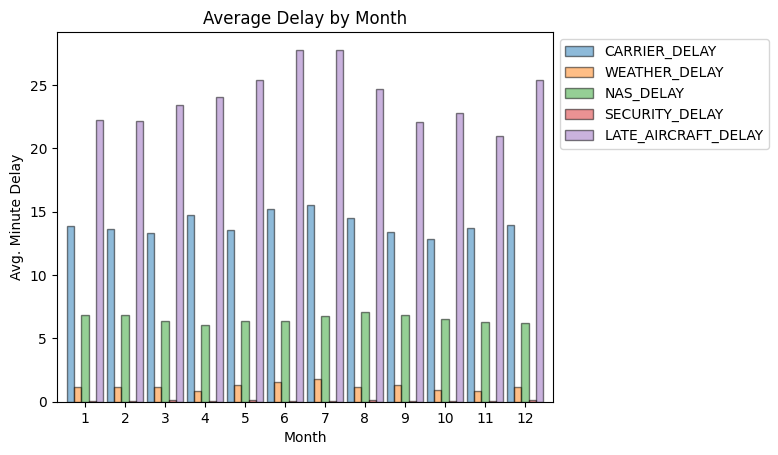

In [33]:
ax = mean_group.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black', alpha=0.5)
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.legend(title_fontsize='small', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

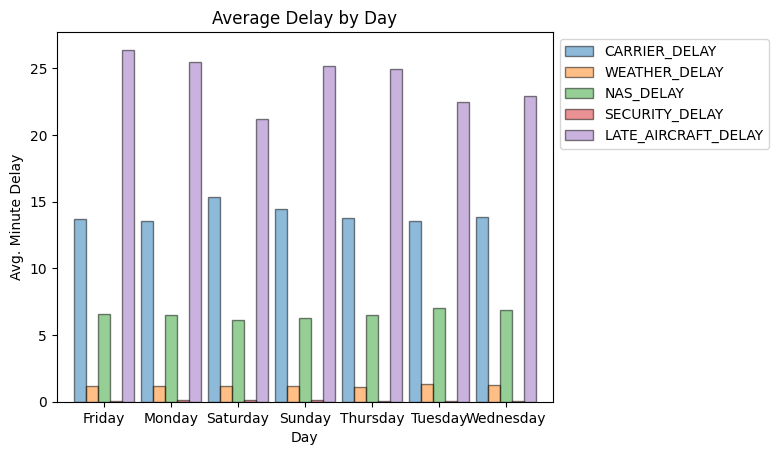

In [34]:
ax = mean_group.groupby(mean_group.index.day_name()).mean().plot.bar(width=.9, ec='black', alpha=0.5)
plt.xticks(rotation=0)
ax.set(title='Average Delay by Day', xlabel='Day', ylabel='Avg. Minute Delay')
plt.legend(title_fontsize='small', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

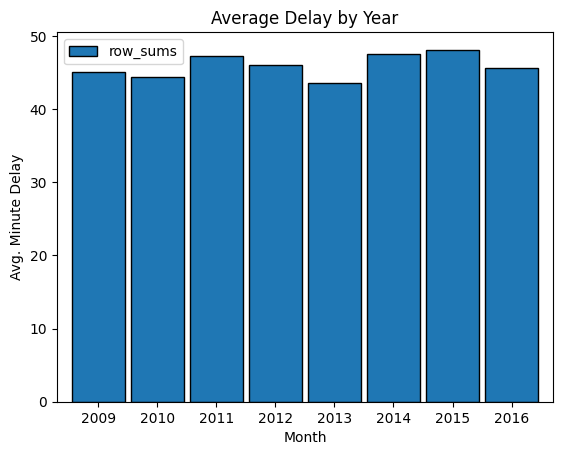

In [35]:
ax = mean_row_grp.groupby(mean_group.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Year', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

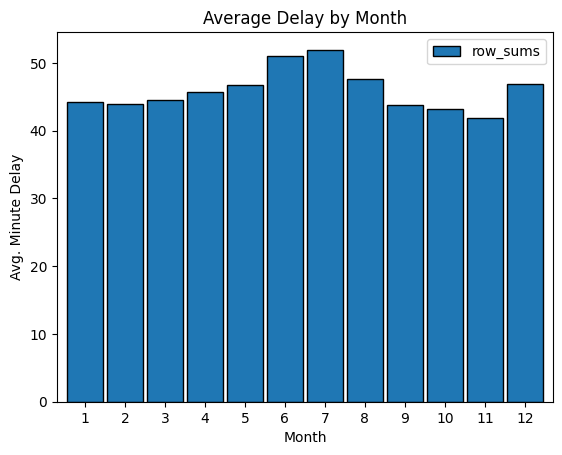

In [36]:
ax = mean_row_grp.groupby(mean_group.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Month', xlabel='Month', ylabel='Avg. Minute Delay')
plt.show()

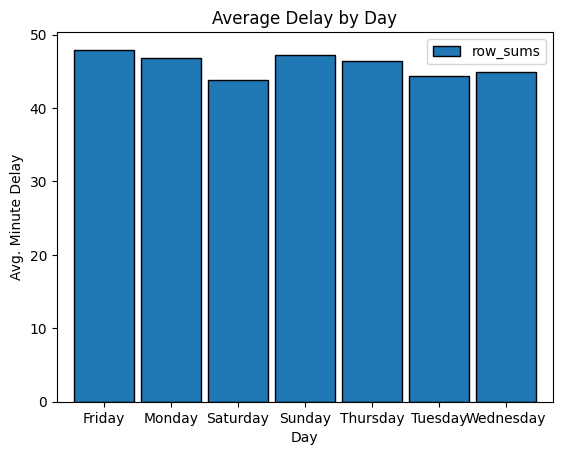

In [37]:
ax = mean_row_grp.groupby(mean_group.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Delay by Day', xlabel='Day', ylabel='Avg. Minute Delay')
plt.show()

### Maximim Delay per Delay type

In [38]:
# Max mean value grouped by Date
train_fl.groupby('FL_DATE')[col_to_sum].mean().max()

CARRIER_DELAY          57.193452
WEATHER_DELAY          27.400000
NAS_DELAY              26.629032
SECURITY_DELAY          7.360759
LATE_AIRCRAFT_DELAY    80.214953
dtype: float64

## Sum values grouped by Origin

In [39]:
flights.groupby('ORIGIN')[col_to_sum].sum()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,849400.0,115276.0,411893.0,4057.0,1271875.0
CLT,50887.0,9459.0,29710.0,392.0,100214.0
DEN,2221314.0,243296.0,1151753.0,7515.0,3413953.0
EWR,143315.0,32651.0,131728.0,3633.0,512605.0
IAD,63183.0,18458.0,63893.0,232.0,106717.0
LAX,1261654.0,65072.0,682643.0,7968.0,2974871.0
PHL,342341.0,58664.0,304566.0,4523.0,839610.0
PHX,2240830.0,103133.0,819290.0,13832.0,2960563.0
SEA,361723.0,24080.0,136938.0,3402.0,671535.0


In [40]:
pd.DataFrame(flights.groupby('ORIGIN')['row_sums'].sum())

,row_sums
ORIGIN,
ATL,2652501.0
CLT,190662.0
DEN,7037831.0
EWR,823932.0
IAD,252483.0
LAX,4992208.0
PHL,1549704.0
PHX,6137648.0
SEA,1197678.0


## Mean values grouped by Origin

In [41]:
origin_group = train_fl.groupby('ORIGIN')[col_to_sum].mean()
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,15.932011,2.724349,8.048969,0.033061,25.112058
CLT,14.300180,3.674655,8.717795,0.096465,28.994008
DEN,15.169588,1.869211,7.304518,0.043011,24.321569
EWR,11.591335,3.154537,10.992603,0.365474,41.978470
IAD,14.023009,4.276106,13.674631,0.041298,23.823894
LAX,11.663107,0.734214,6.612026,0.049009,28.184781
PHL,13.353448,2.413133,11.955971,0.215737,35.994781
PHX,16.159480,0.789052,5.555376,0.089325,21.377997
SEA,14.260469,0.883760,5.063160,0.104927,25.337194


In [42]:
origin_row_grp = pd.DataFrame(train_fl.groupby('ORIGIN')['row_sums'].mean())
origin_row_grp = origin_row_grp.sort_values(by='row_sums', ascending=False)
origin_row_grp

,row_sums
ORIGIN,
EWR,68.082420
PHL,63.933070
SFO,58.424607
IAD,55.838938
CLT,55.783104
ATL,51.850447
DEN,48.707896
LAX,47.243137
SEA,45.649509


In [43]:
origin_row_grp.index

Index(['EWR', 'PHL', 'SFO', 'IAD', 'CLT', 'ATL', 'DEN', 'LAX', 'SEA', 'PHX'], dtype='object', name='ORIGIN')

In [44]:
origin_group.sort_values(by='LATE_AIRCRAFT_DELAY', ascending=False)


,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
SFO,8.915901,0.783582,5.220895,0.048616,43.455614
EWR,11.591335,3.154537,10.992603,0.365474,41.978470
PHL,13.353448,2.413133,11.955971,0.215737,35.994781
CLT,14.300180,3.674655,8.717795,0.096465,28.994008
LAX,11.663107,0.734214,6.612026,0.049009,28.184781
SEA,14.260469,0.883760,5.063160,0.104927,25.337194
ATL,15.932011,2.724349,8.048969,0.033061,25.112058
DEN,15.169588,1.869211,7.304518,0.043011,24.321569
IAD,14.023009,4.276106,13.674631,0.041298,23.823894


In [45]:
origin_row_grp.row_sums

ORIGIN
EWR    68.082420
PHL    63.933070
SFO    58.424607
IAD    55.838938
CLT    55.783104
ATL    51.850447
DEN    48.707896
LAX    47.243137
SEA    45.649509
PHX    43.971230
Name: row_sums, dtype: float64

In [46]:
[pos for pos in list(range(len(origin_row_grp)))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [47]:
[ht for ht in origin_row_grp.row_sums]

[68.08241975960904,
 63.93306986877438,
 58.42460748494125,
 55.838938053097344,
 55.78310365488316,
 51.850447296771684,
 48.70789603935393,
 47.24313746587226,
 45.64950940968313,
 43.971230324952444]

In [48]:
list_of_airports

,ORIGIN
DEN,143939
PHX,137055
LAX,103665
ATL,51285
SFO,42459
SEA,25724
PHL,24573
EWR,12108
IAD,4387
CLT,3569


In [49]:
sorted_list = list_of_airports.sort_values(by='ORIGIN', ascending=False)
sorted_list = list_of_airports.index.to_list()
sorted_list

['DEN', 'PHX', 'LAX', 'ATL', 'SFO', 'SEA', 'PHL', 'EWR', 'IAD', 'CLT']

In [50]:
airport_count = pd.DataFrame(train_fl.ORIGIN.value_counts())
airport_count = airport_count.reindex(sorted_list)
airport_count

,ORIGIN
DEN,98999
PHX,101461
LAX,74353
ATL,25710
SFO,30381
SEA,18651
PHL,19737
EWR,7571
IAD,3390
CLT,1669


In [51]:
origin_group

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
ORIGIN,,,,,
ATL,15.932011,2.724349,8.048969,0.033061,25.112058
CLT,14.300180,3.674655,8.717795,0.096465,28.994008
DEN,15.169588,1.869211,7.304518,0.043011,24.321569
EWR,11.591335,3.154537,10.992603,0.365474,41.978470
IAD,14.023009,4.276106,13.674631,0.041298,23.823894
LAX,11.663107,0.734214,6.612026,0.049009,28.184781
PHL,13.353448,2.413133,11.955971,0.215737,35.994781
PHX,16.159480,0.789052,5.555376,0.089325,21.377997
SEA,14.260469,0.883760,5.063160,0.104927,25.337194


### Bar Plot of Airports Delay Times

In [53]:
# pd.DataFrame(sorted_data)

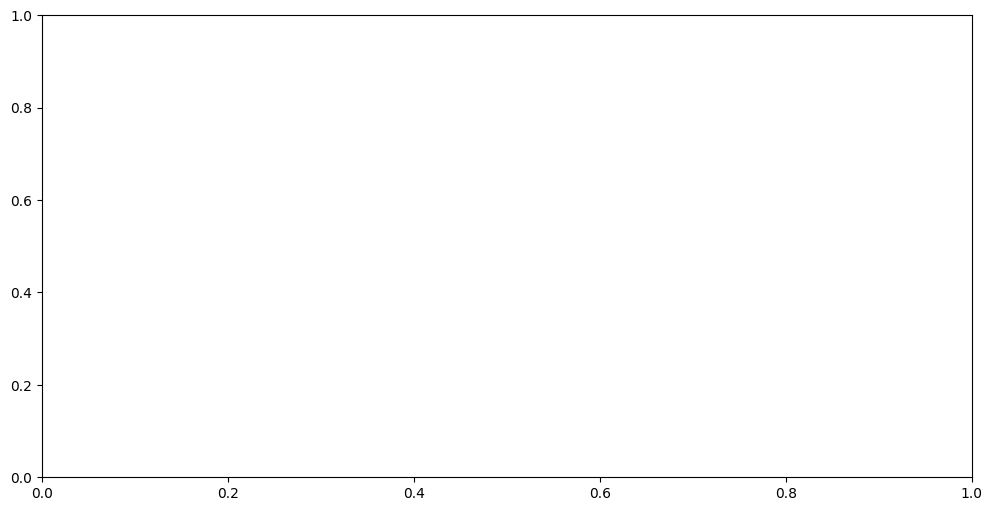

In [54]:
import numpy as np

# Create a sample DataFrame with 12 x-ticks, each containing 5 bars
data = pd.DataFrame(np.random.rand(12, 5), columns=["Bar1", "Bar2", "Bar3", "Bar4", "Bar5"])

# Create a bar graph
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15  # Adjust the width of the bars as needed

x = np.arange(len(data))

# Sort the data within each x-tick group from largest to smallest
sorted_data = data.apply(lambda x: x.sort_values(ascending=False).values, axis=1)

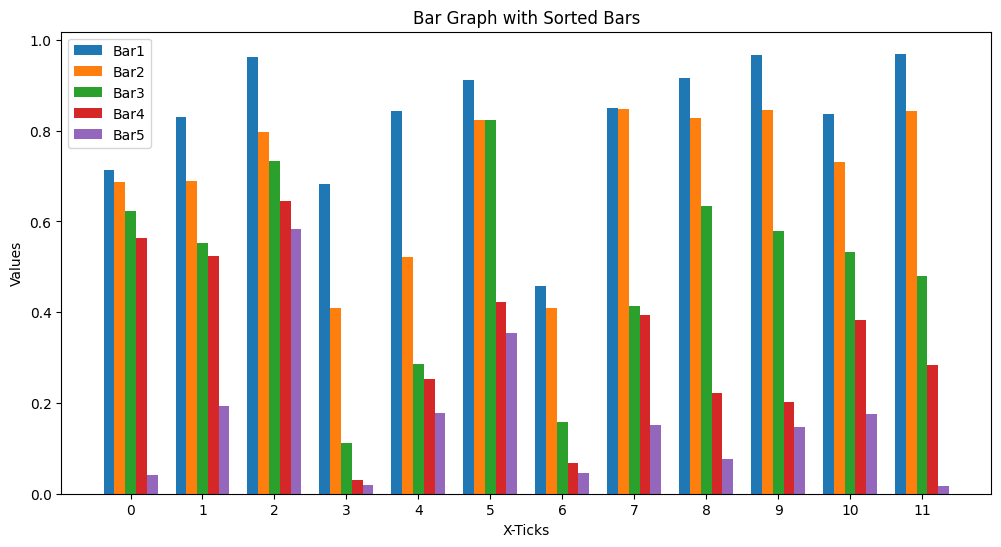

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a sample DataFrame with 12 x-ticks, each containing 5 bars
data = pd.DataFrame(np.random.rand(12, 5), columns=["Bar1", "Bar2", "Bar3", "Bar4", "Bar5"])

# Create a bar graph
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15  # Adjust the width of the bars as needed

x = np.arange(len(data))

# Sort the data within each x-tick group from largest to smallest
sorted_data = data.apply(lambda x: x.sort_values(ascending=False).values, axis=1)

sorted_data = pd.DataFrame(sorted_data.tolist(), columns=["SortedBar1", "SortedBar2", "SortedBar3", "SortedBar4", "SortedBar5"])


# Plot the bars
for i in range(len(sorted_data.columns)):
    ax.bar(x + i * width, sorted_data.iloc[:, i], width, label=f'Bar{i+1}')

# Set the x-tick labels
ax.set_xticks(x + width * ((len(sorted_data.columns) - 1) / 2))
ax.set_xticklabels(data.index)

# Add labels and legend
ax.set_xlabel("X-Ticks")
ax.set_ylabel("Values")
ax.set_title("Bar Graph with Sorted Bars")
ax.legend()

plt.show()


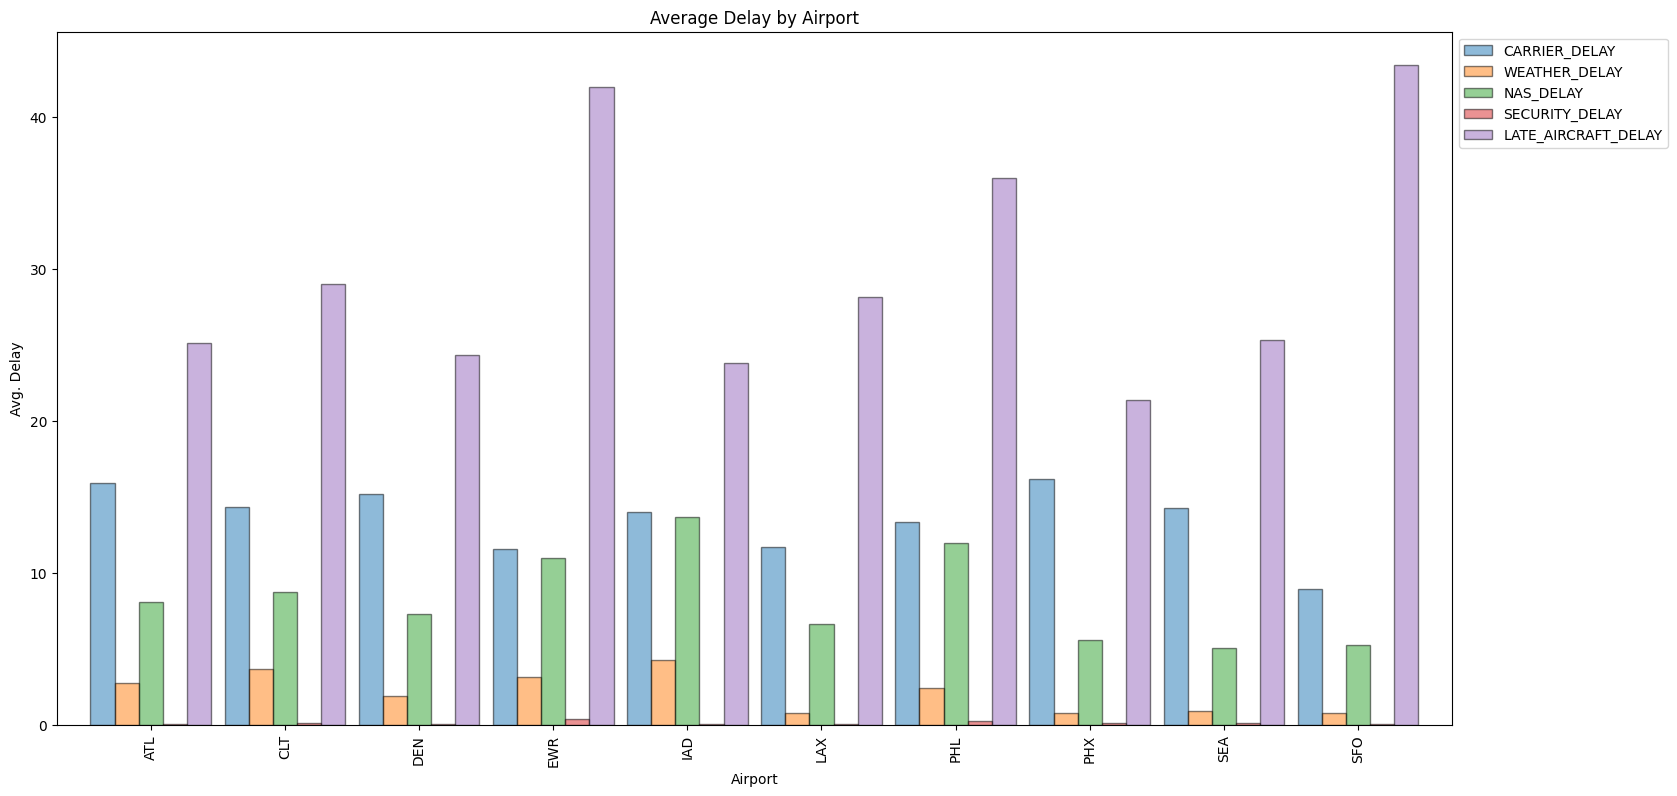

In [56]:
# Create the bar plot
ax = origin_group.plot.bar(width=0.9, ec='black', alpha=.5, figsize=(18, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

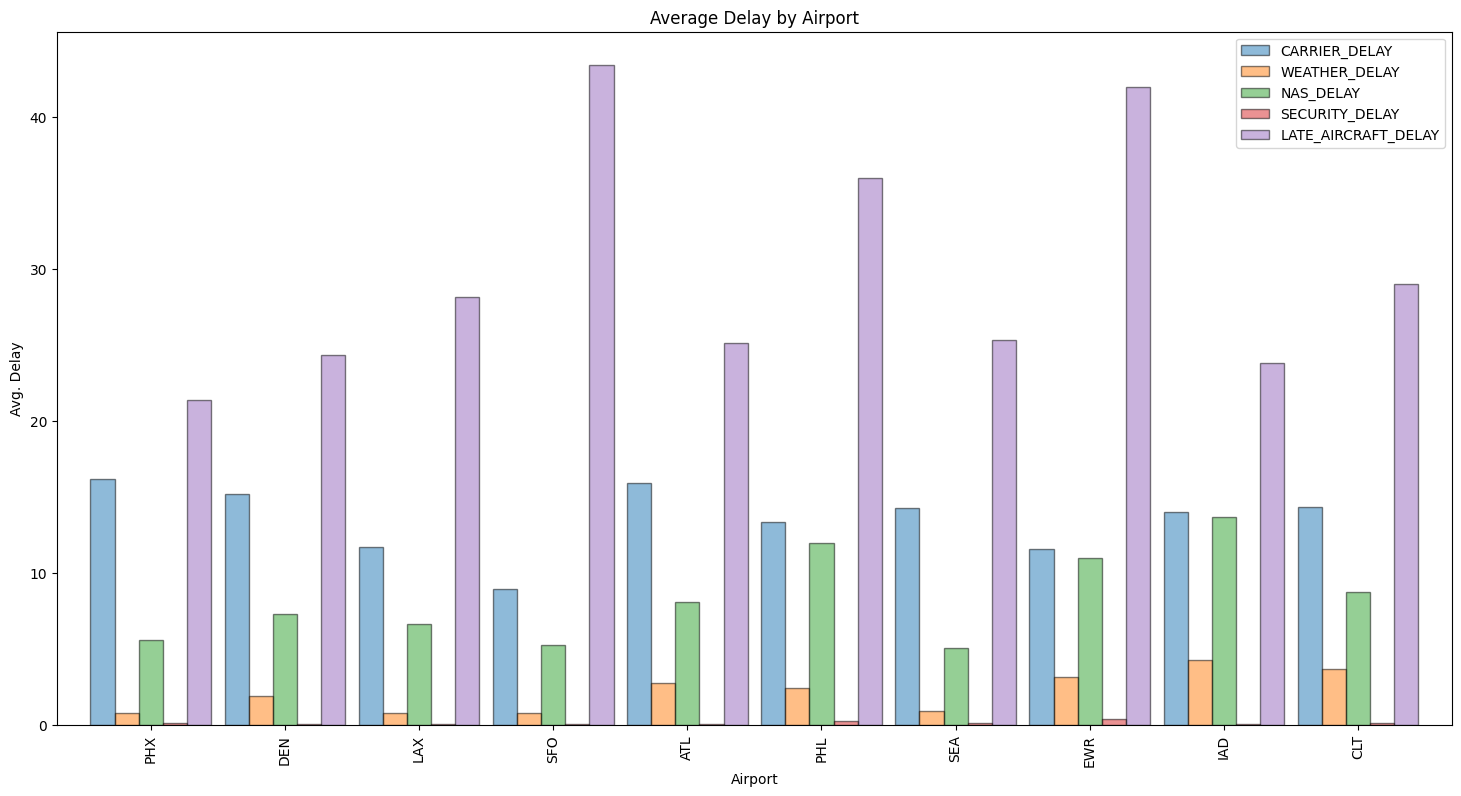

In [57]:
# Create the bar plot
ax = origin_group.reindex(airport_count.sort_values(by='ORIGIN', ascending=False).index).plot.bar(width=0.9, ec='black', alpha=.5, figsize=(18, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

### Bar Plot of Sorted Airports Average Delay Time

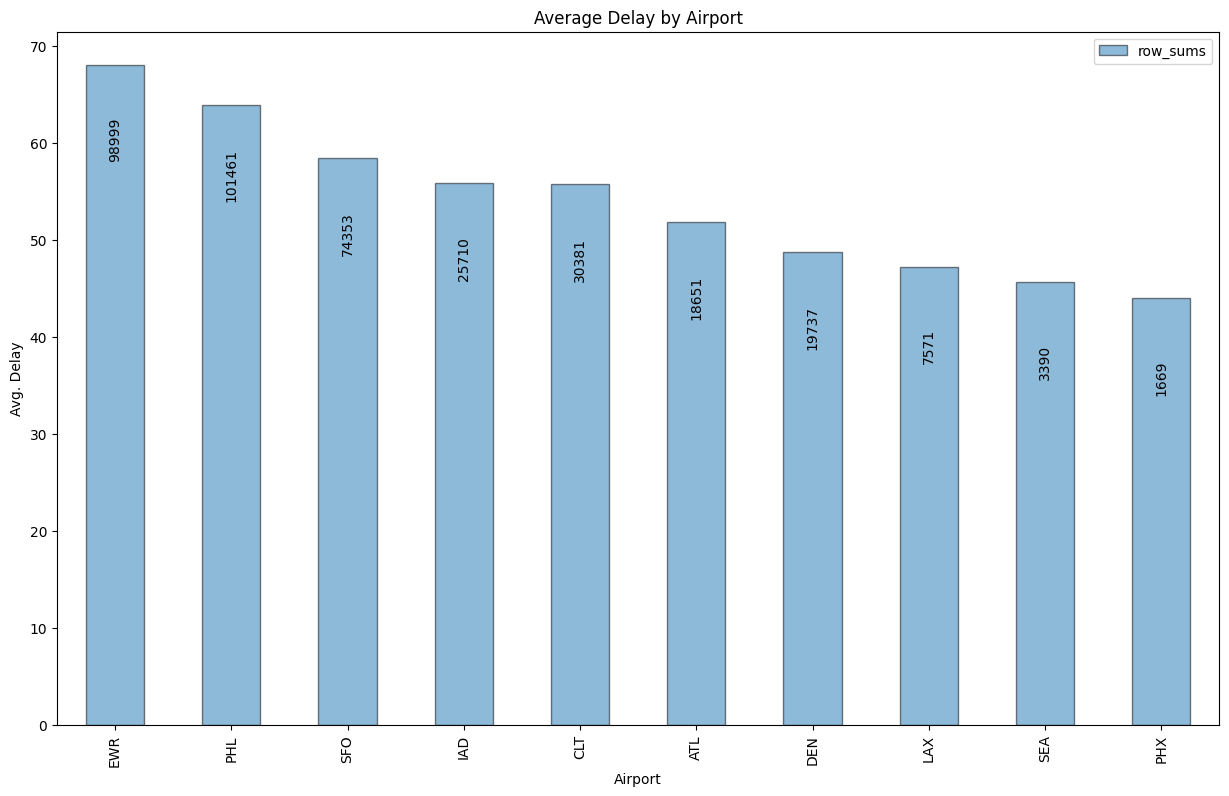

In [58]:

# Create the bar plot
ax = origin_row_grp.plot.bar(width=0.5, ec='black', alpha=.5, figsize=(15, 9))

# Set plot title and labels
ax.set(title='Average Delay by Airport', xlabel='Airport', ylabel='Avg. Delay')

# Get the heights and positions for text labels
ht_list = [ht for ht in origin_row_grp.row_sums]
pos_list = list(range(len(origin_row_grp)))
airport_val_list = [val for val in airport_count.ORIGIN]


# Loop through the data and add text labels inside the existing plot
for ht, pos, val in zip(ht_list, pos_list, airport_val_list):
    ax.text(pos, ht-10, val, fontsize=10, ha='center', va='bottom', rotation=90)  # Adjust ha and va as needed

# Show the plot
plt.show()


### Null Hypothesis:
The average delay in each airport are all the same.

### Alternative Hypothesis:
The average delay in each airport are not all the same.

### Is the mean at each airport equal or is there something causing  a difference?
### Anova Test

In [59]:
airport_count

,ORIGIN
DEN,98999
PHX,101461
LAX,74353
ATL,25710
SFO,30381
SEA,18651
PHL,19737
EWR,7571
IAD,3390
CLT,1669


In [60]:
airport_val_list

[98999, 101461, 74353, 25710, 30381, 18651, 19737, 7571, 3390, 1669]

In [61]:
train.groupby([train.index.year, train.index.month]).mean()

average_delay
FL_DATE FL_DATE               
2009    1            43.001604
        2            45.840927
        3            43.786945
        4            47.231572
        5            46.634695
...                        ...
2016    8            47.577937
        9            43.505251
        10           41.161650
        11           40.313585
        12           47.254941

[96 rows x 1 columns]

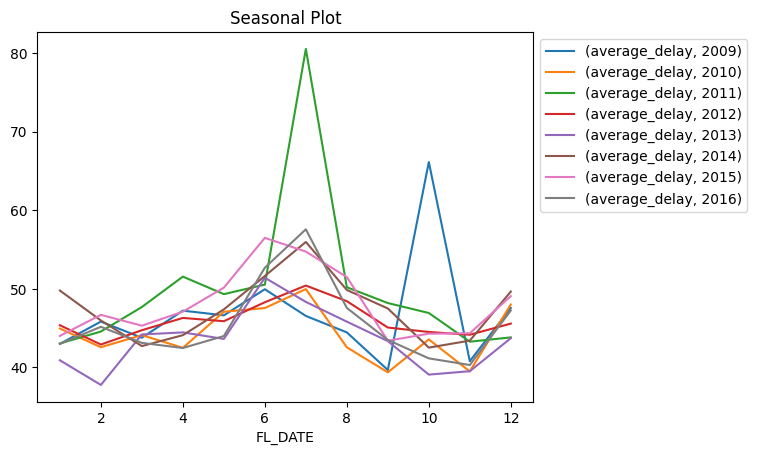

In [62]:
# .unstack turns an index level into columns
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
plt.show()

In [63]:
train


,average_delay
FL_DATE,
2009-01-01,38.719512
2009-01-02,54.142857
2009-01-03,34.230159
2009-01-04,51.712963
2009-01-05,48.283186
...,...
2016-12-27,40.953917
2016-12-28,42.632850
2016-12-29,35.970297


<Axes: xlabel='weekday', ylabel='average_delay'>

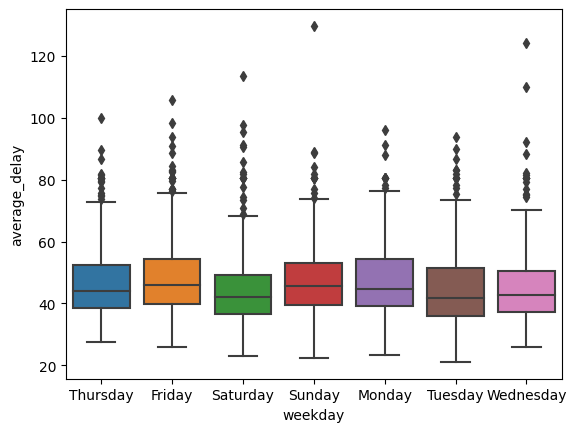

In [64]:
(
    train.reset_index()
    .assign(weekday=lambda train: train.FL_DATE.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='weekday')
)

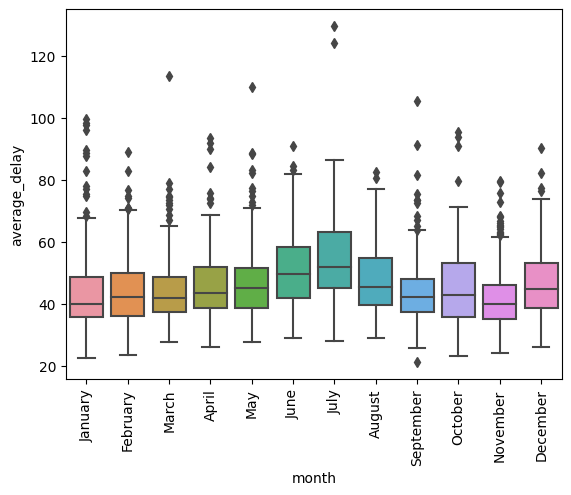

In [65]:
(
    train.reset_index()
    .assign(month=lambda train: train.FL_DATE.dt.month_name())
    .pipe((sns.boxplot, 'data'), y='average_delay', x='month')
)
plt.xticks(rotation=90)
plt.show()

In [66]:
train_fl.groupby([train_fl.index.year, train_fl.index.month])[col_to_sum].mean()

CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
FL_DATE FL_DATE                                                            
2009    1            10.253892       1.224240   7.267235        0.047443   
        2            10.092694       1.178082  10.015982        0.044749   
        3            11.035951       1.388482   7.072600        0.129145   
        4            12.179981       1.221688   7.701636        0.024382   
        5            11.193682       0.757179   6.917039        0.045310   
...                        ...            ...        ...             ...   
2016    8            13.684845       1.514376   8.060100        0.255982   
        9            12.868852       1.361241   7.907787        0.004977   
        10            9.933397       0.591609   7.911590        0.002133   
        11           10.774123       0.774123   8.446272        0.295504   
        12           13.527231       1.320311   6.867075        0.017878   

                 LATE_AIRCRAFT_DELAY  
FL_DATE FL_DATE                       
2009    1                  26.735360  
        2                  28.853881  
        3                  28.175567  
        4                  31.197305  
        5                  29.763242  
...                              ...  
2016    8                  25.381562  
        9                  22.571136  
        10                 25.590661  
        11                 21.658991  
        12                 30.582188  

[94 rows x 5 columns]

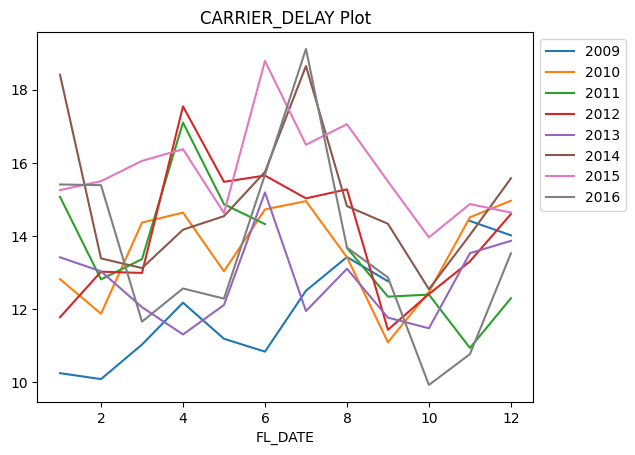

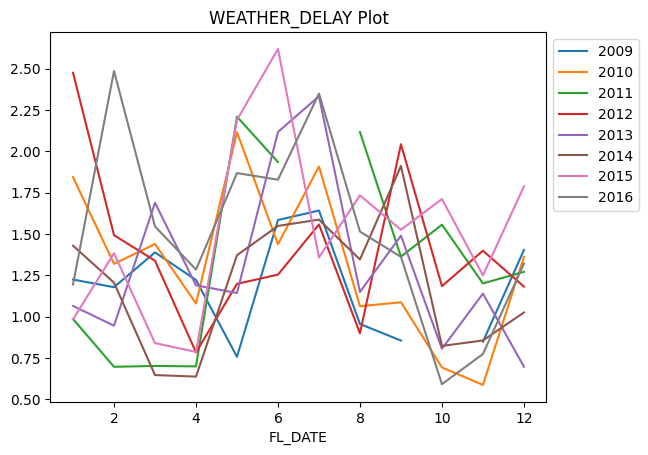

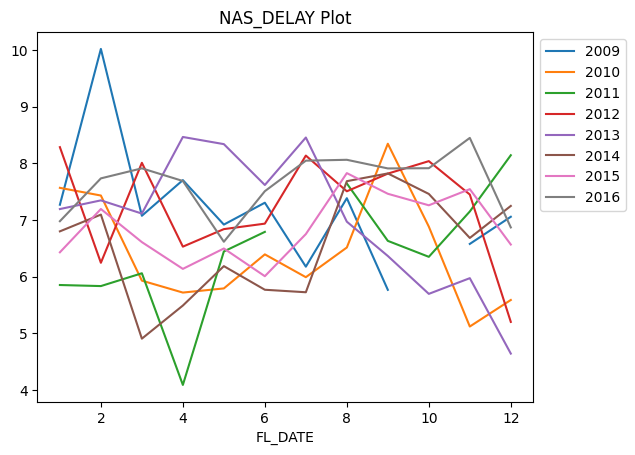

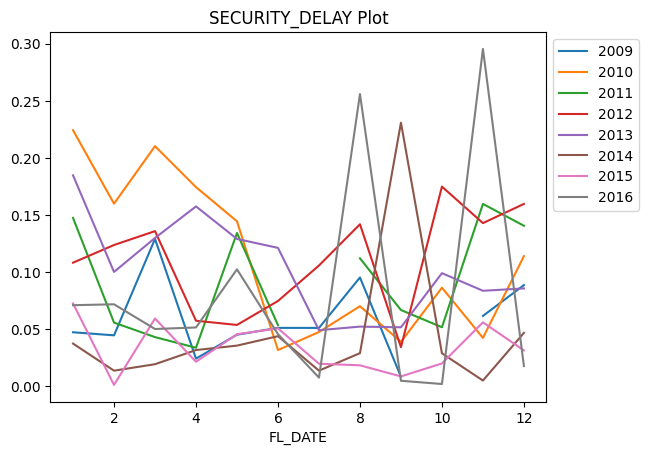

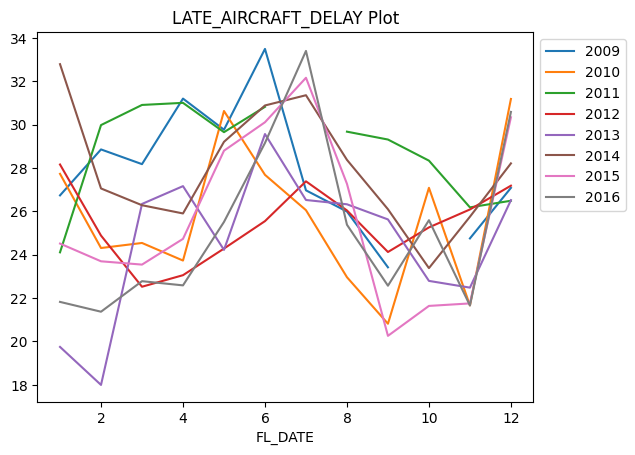

In [67]:
for col in col_to_sum:
    train_fl.groupby([train_fl.index.year, train_fl.index.month])[col].mean().unstack(0).plot(title=f'{col} Plot')
    plt.legend(title_fontsize='medium', alignment='right', bbox_to_anchor=(1, 1))
    plt.show()

### A look at histograms

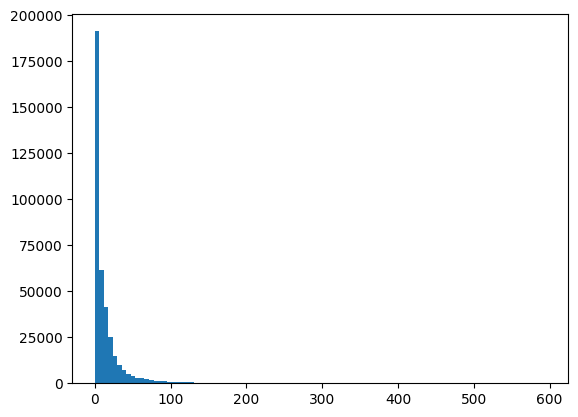

In [68]:
plt.hist(train_fl.CARRIER_DELAY, bins=100)
plt.show()

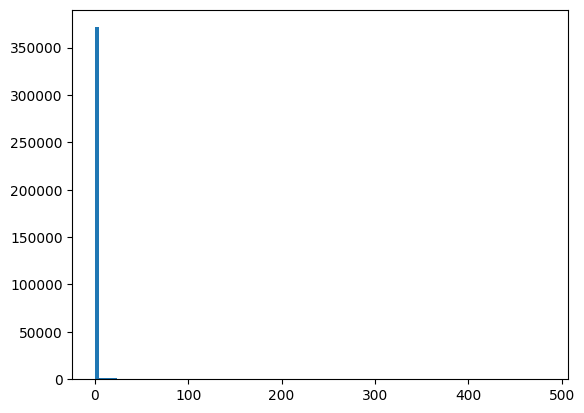

In [69]:
plt.hist(train_fl.WEATHER_DELAY, bins=100)
plt.show()

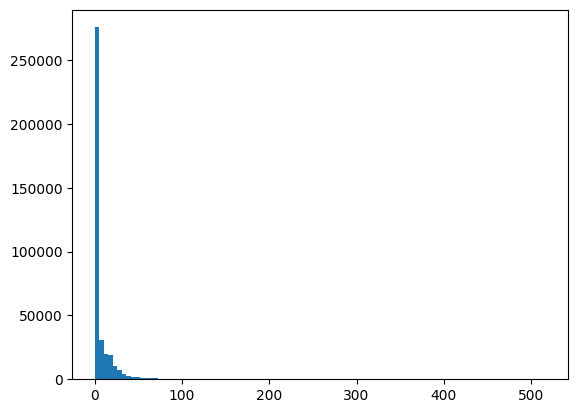

In [70]:
plt.hist(train_fl.NAS_DELAY, bins=100)
plt.show()

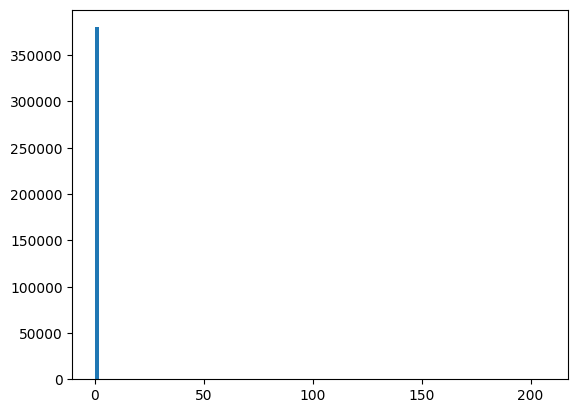

In [71]:
plt.hist(train_fl.SECURITY_DELAY, bins=100)
plt.show()

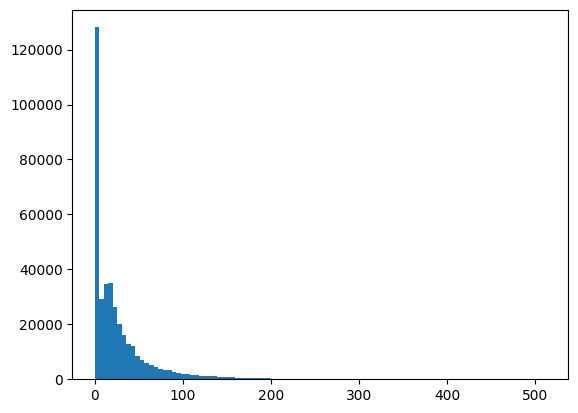

In [72]:
plt.hist(train_fl.LATE_AIRCRAFT_DELAY, bins=100)
plt.show()

### Find the best interval to define average delay by to optimize reducing noise while keeping good correlation results

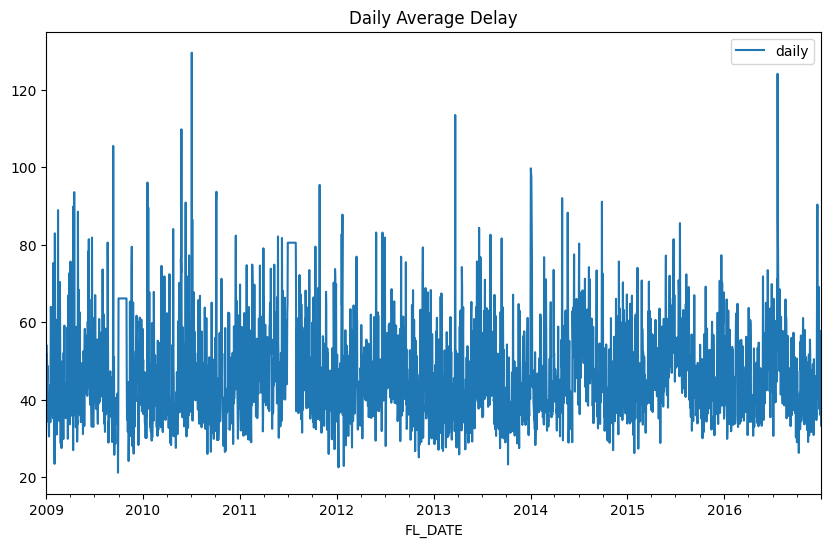

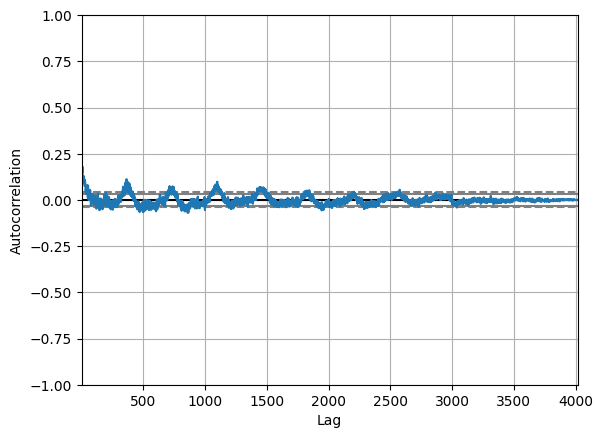

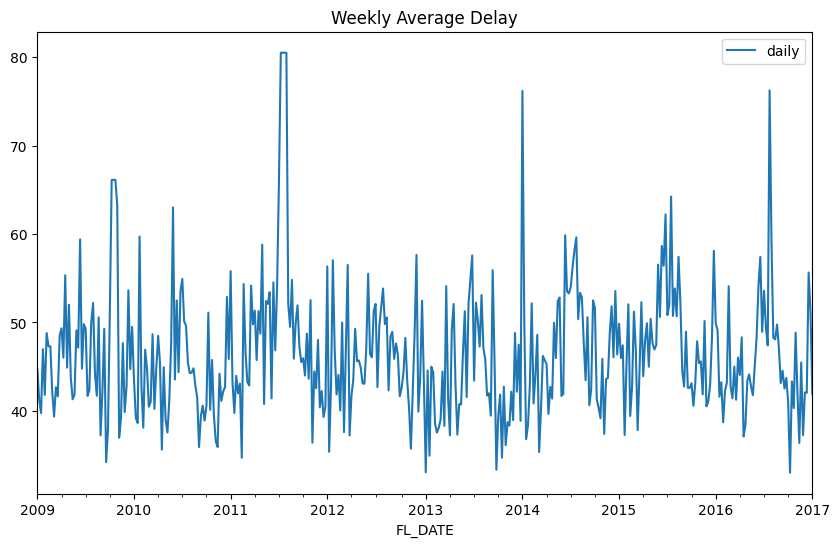

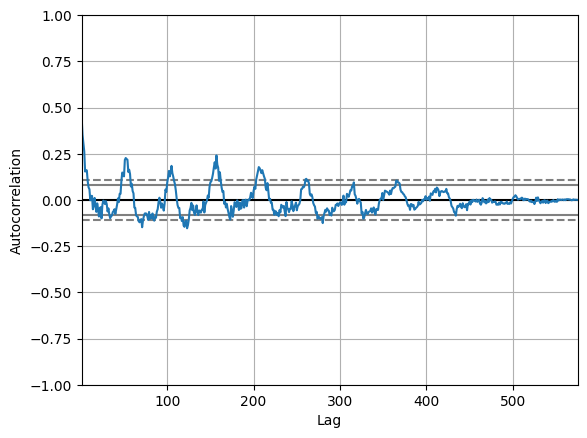

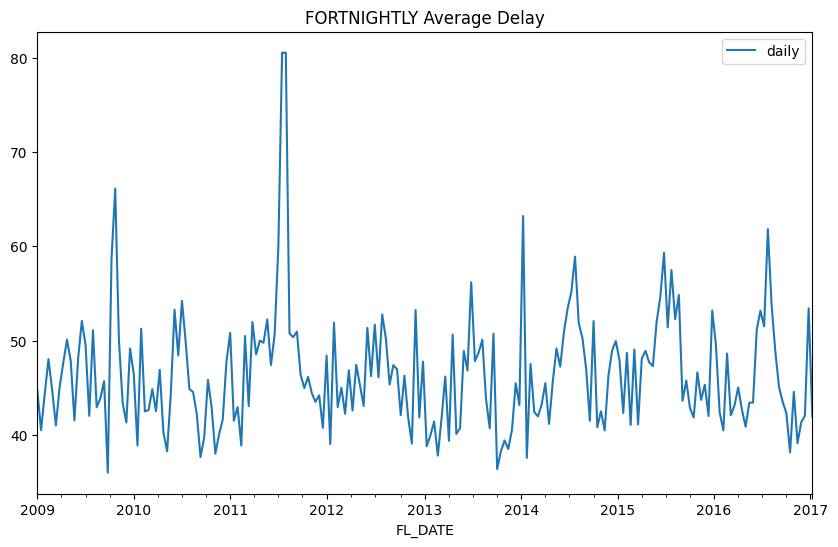

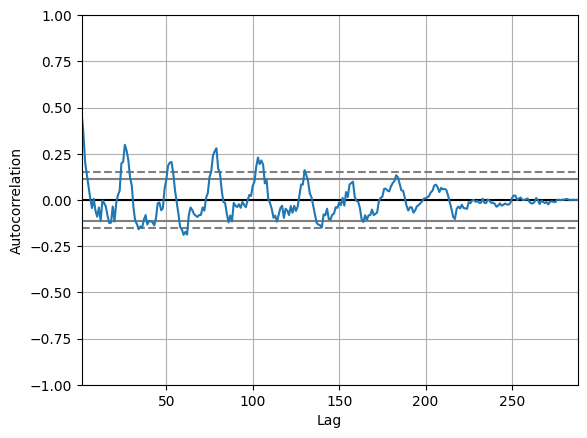

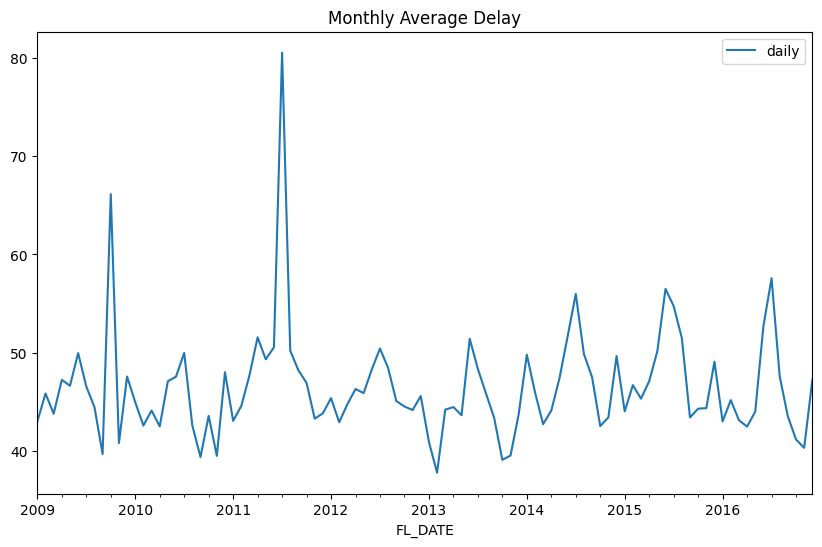

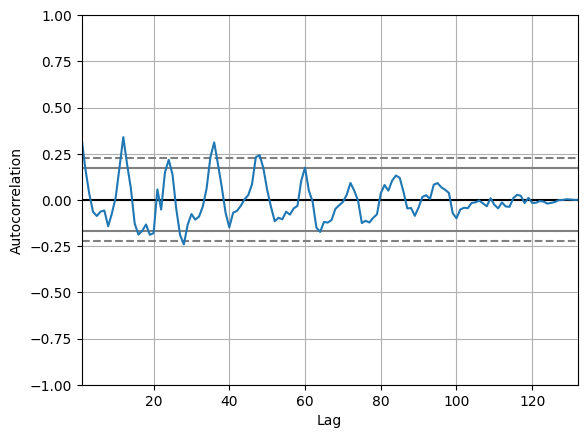

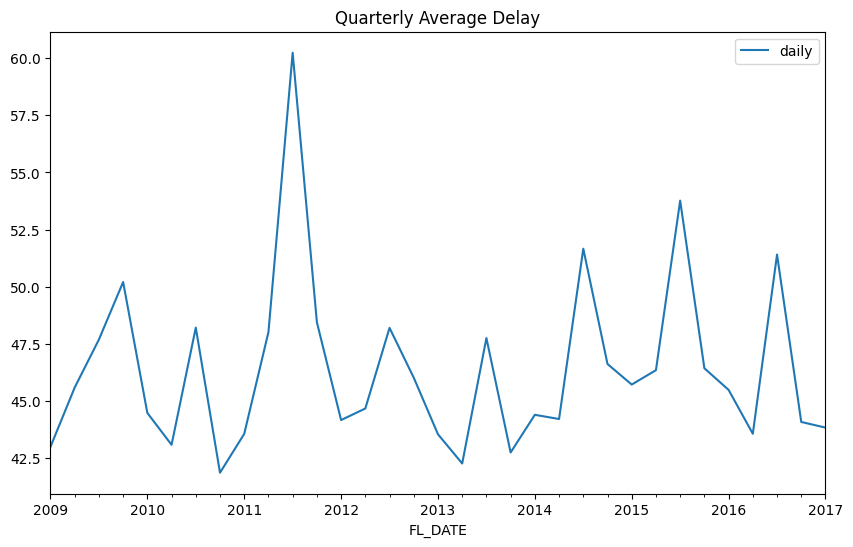

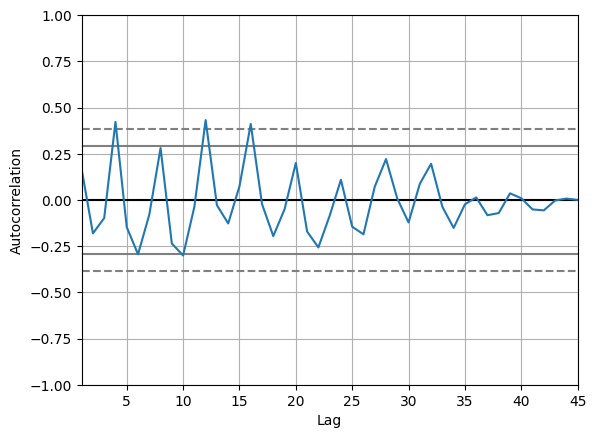

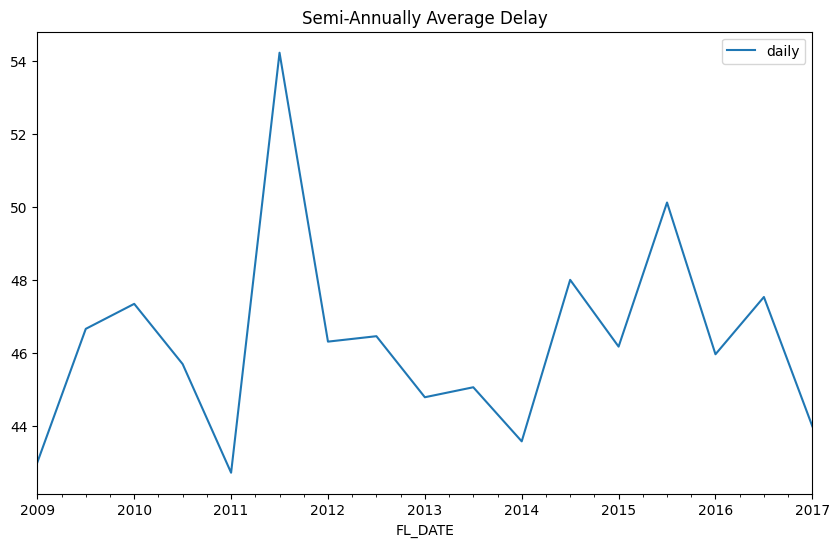

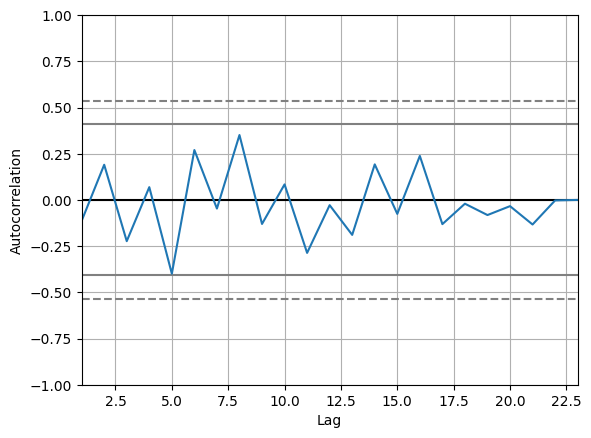

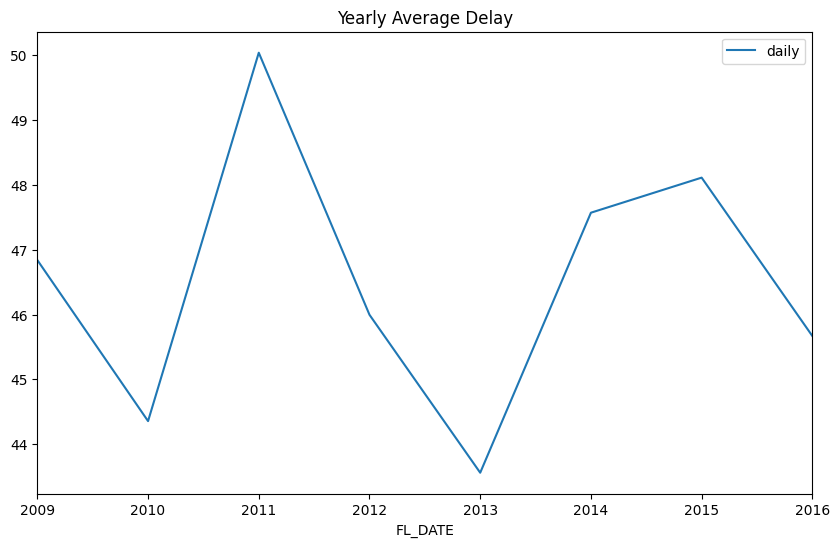

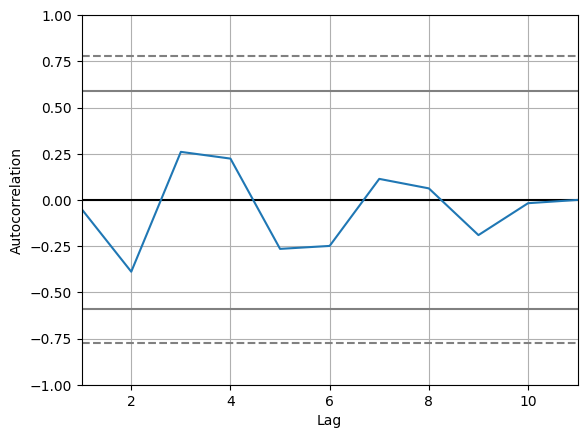

In [73]:
def plot_average_by_interval():
    
    resample_dict = {'D':'Daily', 'W':'Weekly', '2W':'FORTNIGHTLY', 'M':'Monthly', '3M':'Quarterly', '6M':'Semi-Annually', 'Y':'Yearly'}

    for _ in resample_dict:
        plt.figure(figsize=(10,6))

        train.resample(_).mean().average_delay.plot(label='daily')
        # flights_daily_mean.resample('W').mean().average_delay.plot(label='weekly')
        # flights_daily_mean.resample('M').mean().average_delay.plot(label='monthly')
        # flights_daily_mean.resample('Y').mean().average_delay.plot(label='yearly')


        plt.title(f'{resample_dict[_][0:]} Average Delay')
        plt.legend()
        plt.show()

        pd.plotting.autocorrelation_plot(df.average_delay.resample(_).mean())
        plt.show()

plot_average_by_interval()

### Function for lag plot 

In [74]:
def plot_best_lag_plot(sample, lag):

    #Plots the best correlated lag
    pd.plotting.lag_plot(train.resample(sample).mean(), lag=lag)
    #plt.ylabel(f'{sample} Lagged Values')
    #plt.title(f'{sample}lag plot');



## Pearson R Testing

### Is there a correlation?

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

In [76]:
len(train.resample('y').mean().values[0:-1])

7

In [77]:
len(train.resample('y').mean().values[1:])

7

In [78]:
for (x, y) in zip(flattened_x, flattened_y):
    print(x,y)

NameError: name 'flattened_x' is not defined

In [79]:
for i in train.resample('m').mean().values:
    np.array(i)
    flattened_list = [item for sublist in nested_list for item in sublist]
    print(i)

NameError: name 'nested_list' is not defined

# Pearoson's R Testing

### Monthly Testing

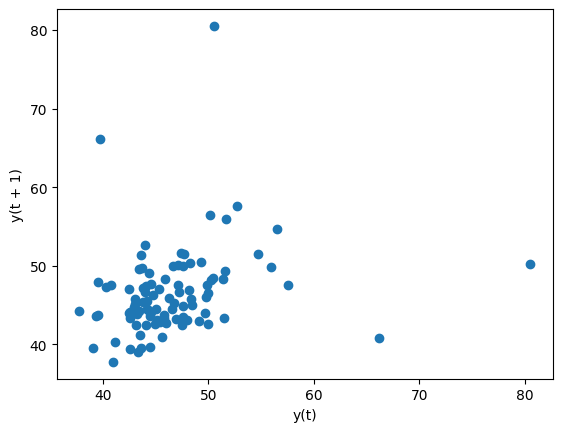

In [80]:
plot_best_lag_plot('m', 1)

In [81]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('m').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('m').mean().values[1:] for item in sublist]


In [82]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.23852323519278437, 0.019924563438291697)

### Weekly Testing

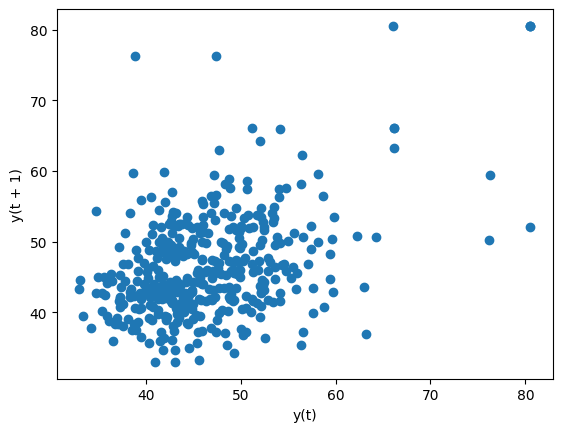

In [83]:
plot_best_lag_plot('w', 1)

In [84]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('w').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('w').mean().values[1:] for item in sublist]


In [85]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.433455996761072, 1.5741852726441797e-20)

### 2 Week Testing

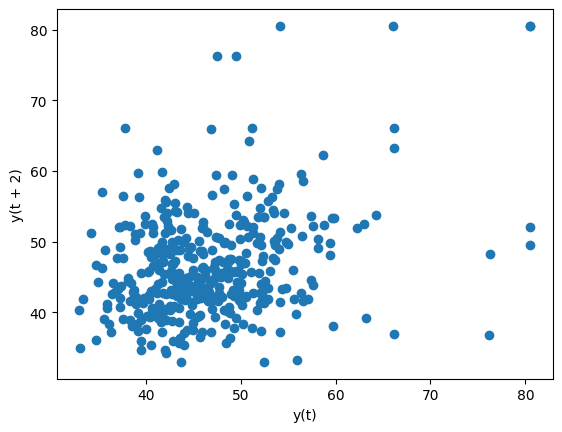

In [86]:
plot_best_lag_plot('w', 2)

In [87]:
# Removing the array from each list
flattened_x = [item for sublist in train.resample('2w').mean().values[0:-1] for item in sublist]
# Removing the array from each list
flattened_y = [item for sublist in train.resample('2w').mean().values[1:] for item in sublist]


In [88]:
corr, p = stats.pearsonr(flattened_x, flattened_y)#, (train.resample('1m'))
corr, p


(0.41940687334985527, 2.6022761179873463e-10)

### Plot the seasonal decompositions for the various time periods

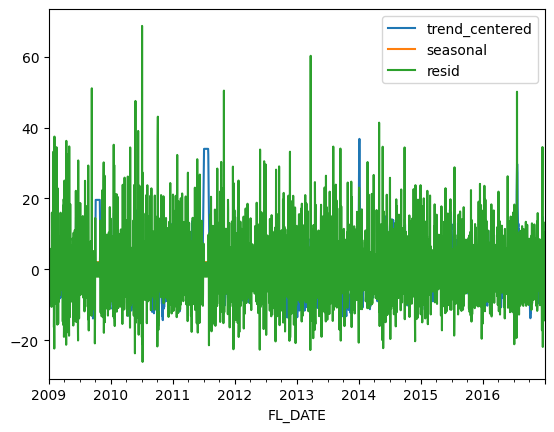

In [89]:
y = train.average_delay.resample('d').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

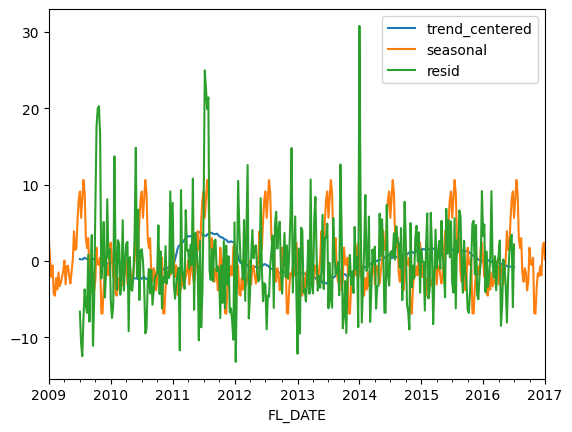

In [90]:
y = train.average_delay.resample('w').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

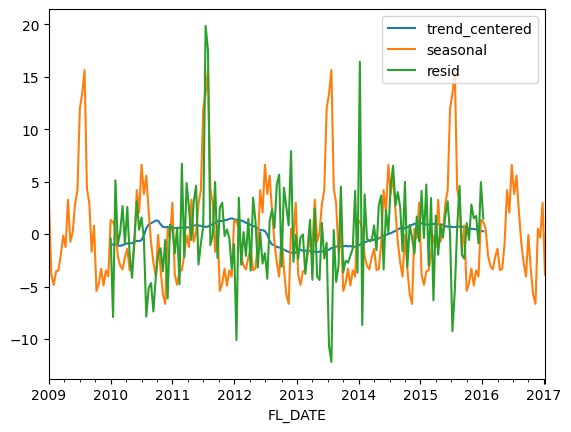

In [91]:
def seasonal_decomposition_plot(duration):
    y = train.average_delay.resample(duration).mean()

    result = sm.tsa.seasonal_decompose(y)

    decomposition = pd.DataFrame({
        'y': result.observed,
        'trend': result.trend,
        'seasonal': result.seasonal,
        'resid': result.resid
    })

    decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
    decomposition[['trend_centered', 'seasonal', 'resid']].plot();
    
seasonal_decomposition_plot('2w')

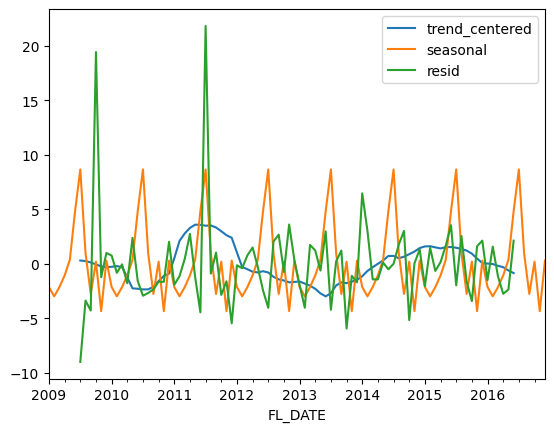

In [92]:
y = train.average_delay.resample('m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

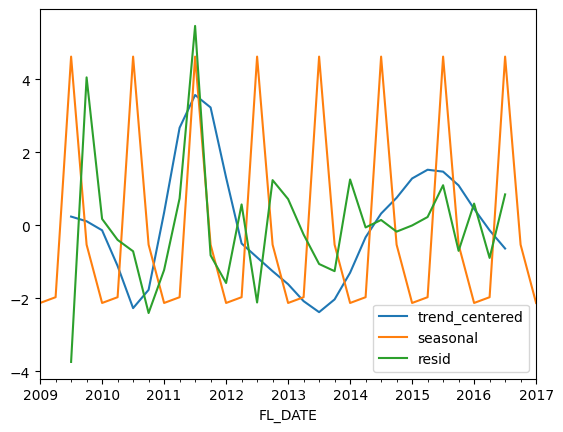

In [93]:
y = train.average_delay.resample('3m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

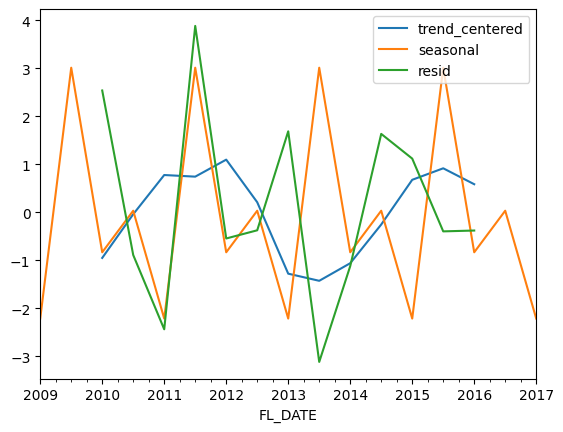

In [94]:
y = train.average_delay.resample('6m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

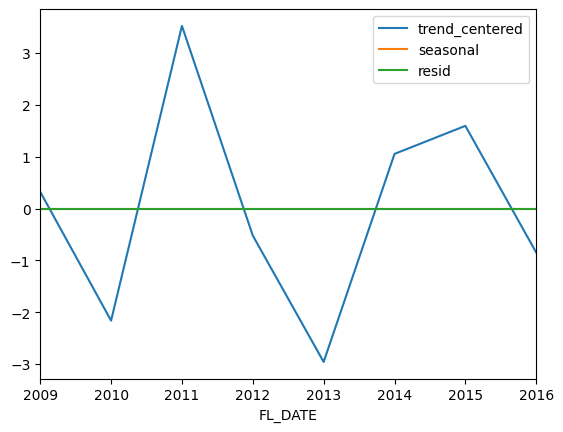

In [95]:
y = train.average_delay.resample('y').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

In [96]:
import pandas as pd

def sort_rows_highest_to_lowest(df):
    """
    Sort each row in a DataFrame from highest to lowest value.
    
    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: A new DataFrame with rows sorted.
    """
    # Use the apply method to sort each row
    sorted_df = df.apply(lambda row: sorted(row, reverse=True), axis=1)
    
    return sorted_df


